In [5]:
import pandas as pd
import os

category_attributes = pd.read_parquet('category_attributes.parquet')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print("CATEGORY ATTRIBUTES")
print(category_attributes.head())
print("\n")
print(category_attributes.describe())
print("\n")

print("TRAIN DATA")
print(train_data.head(),"\n")
print(train_data.describe(),"\n")


CATEGORY ATTRIBUTES
              Category  No_of_attribute  \
0          Men Tshirts                5   
1               Sarees               10   
2               Kurtis                9   
3        Women Tshirts                8   
4  Women Tops & Tunics               10   

                                      Attribute_list  
0  [color, neck, pattern, print_or_pattern_type, ...  
1  [blouse_pattern, border, border_width, color, ...  
2  [color, fit_shape, length, occasion, ornamenta...  
3  [color, fit_shape, length, pattern, print_or_p...  
4  [color, fit_shape, length, neck_collar, ocassi...  


       No_of_attribute
count         5.000000
mean          8.400000
std           2.073644
min           5.000000
25%           8.000000
50%           9.000000
75%          10.000000
max          10.000000


TRAIN DATA
   id     Category  len      attr_1 attr_2   attr_3   attr_4         attr_5  \
0   0  Men Tshirts    5     default  round  printed  default  short sleeves   
1   1  Men 

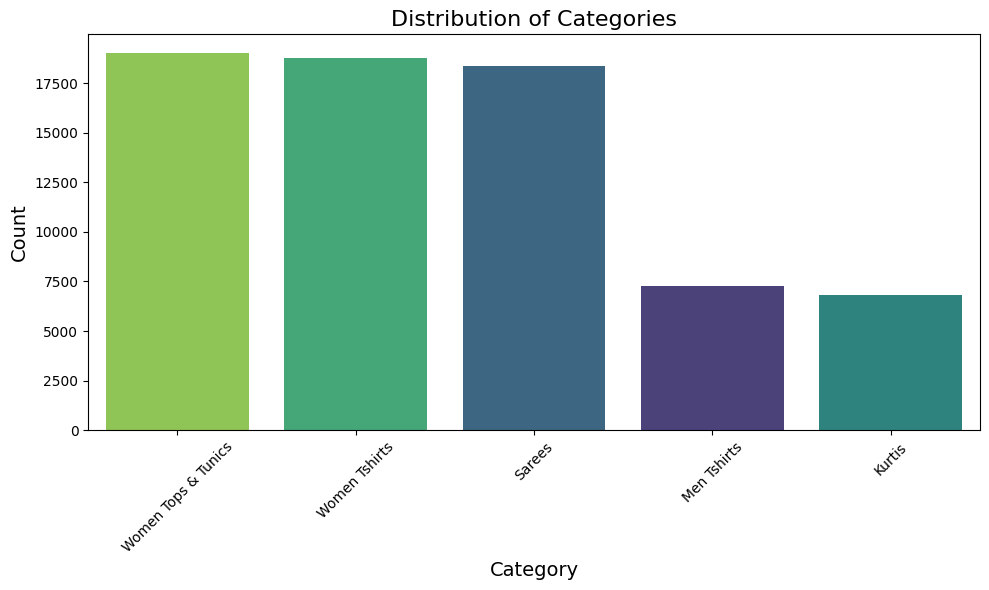

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x="Category", hue="Category", palette="viridis", order=train_data["Category"].value_counts().index, legend=False)
plt.title("Distribution of Categories", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


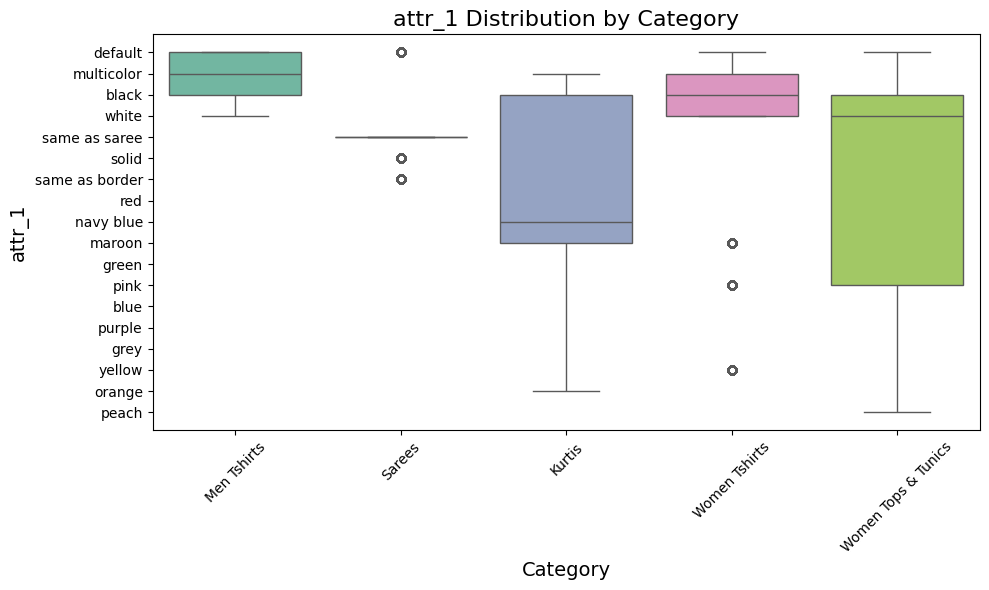

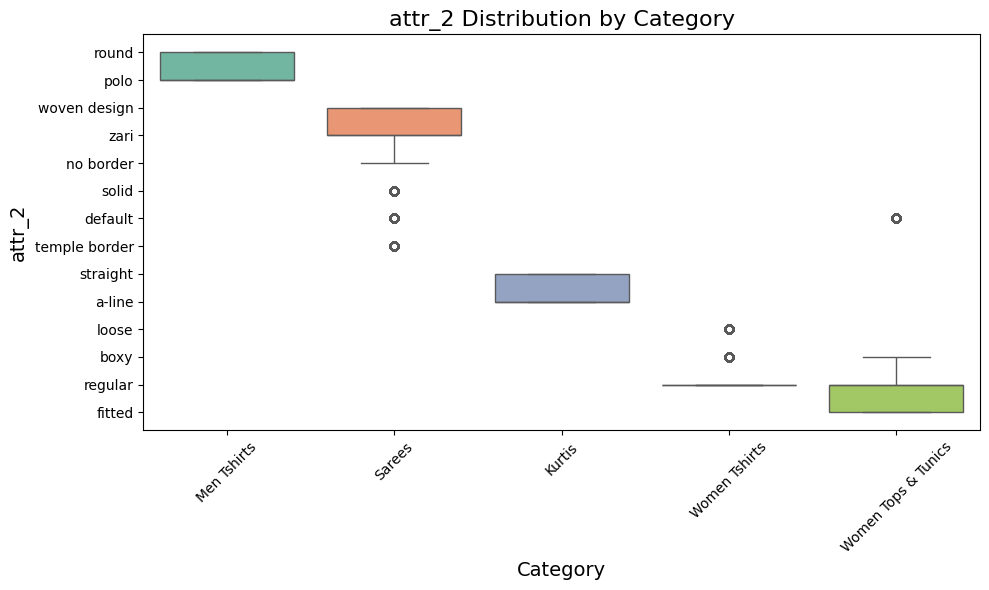

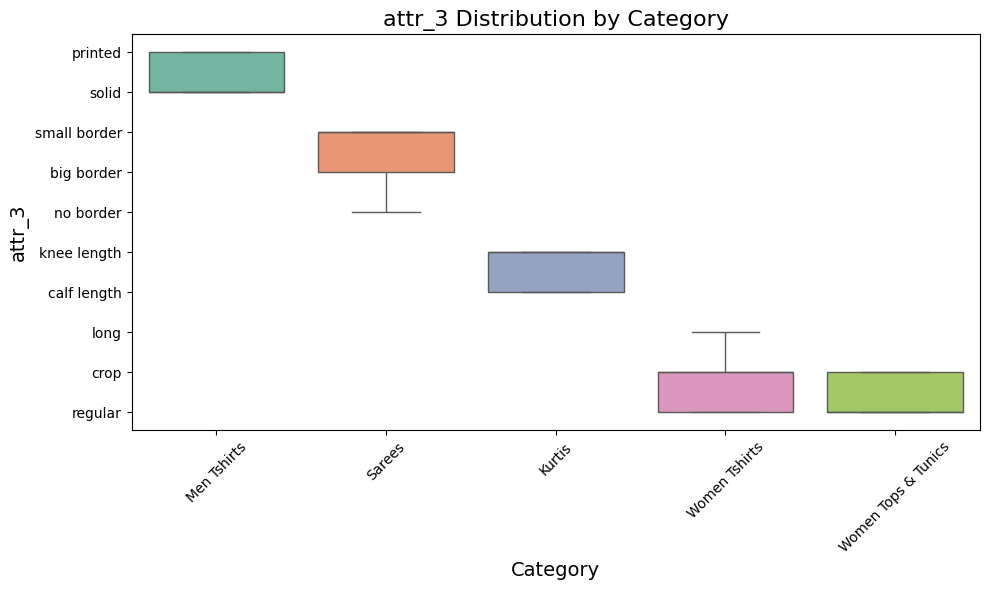

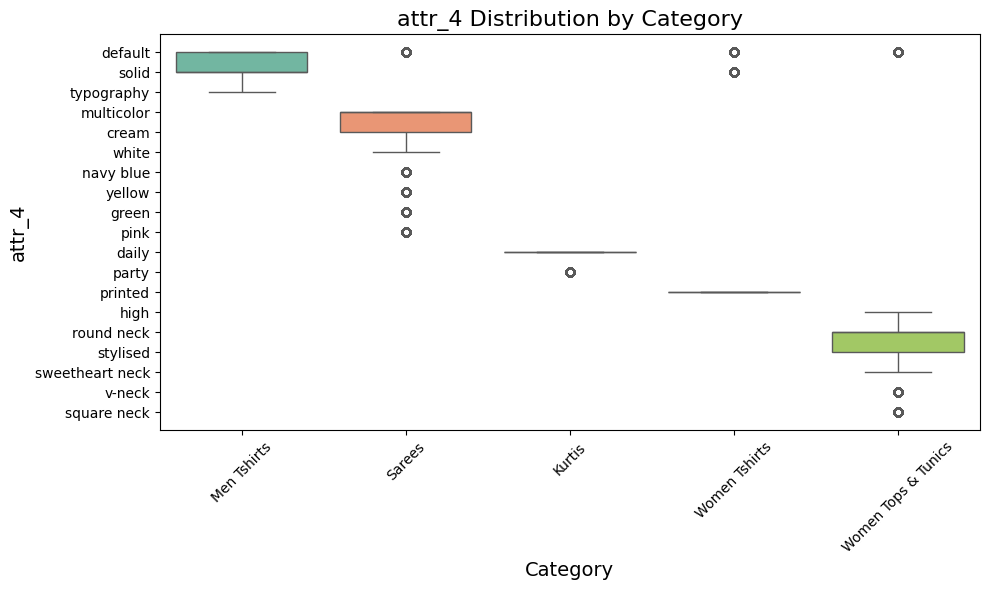

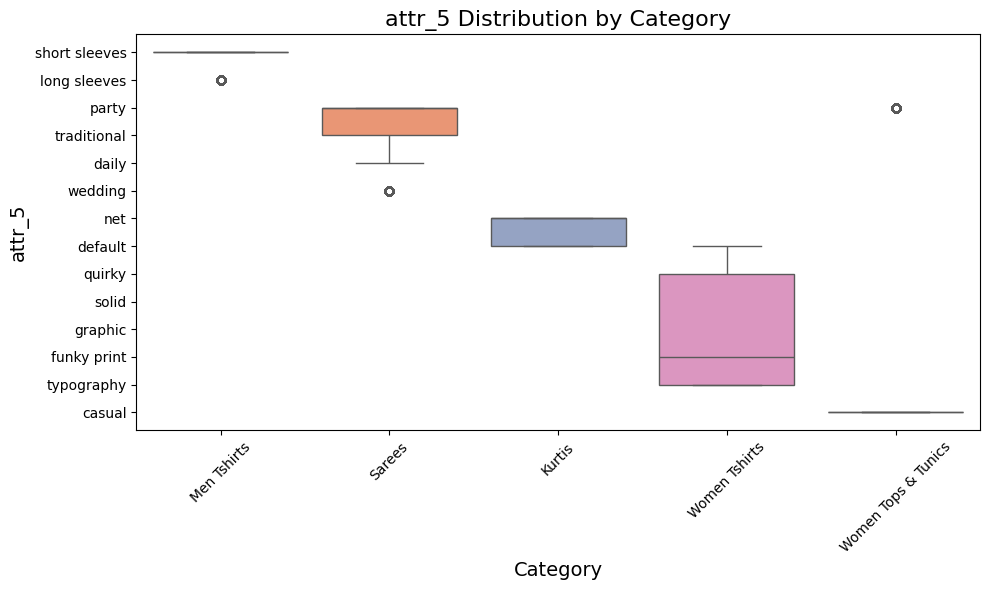

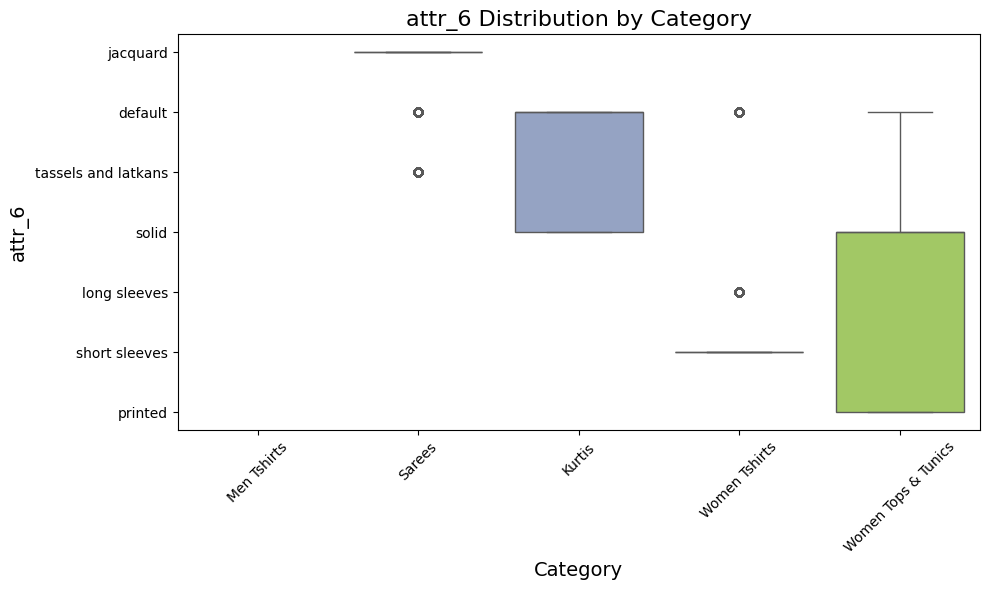

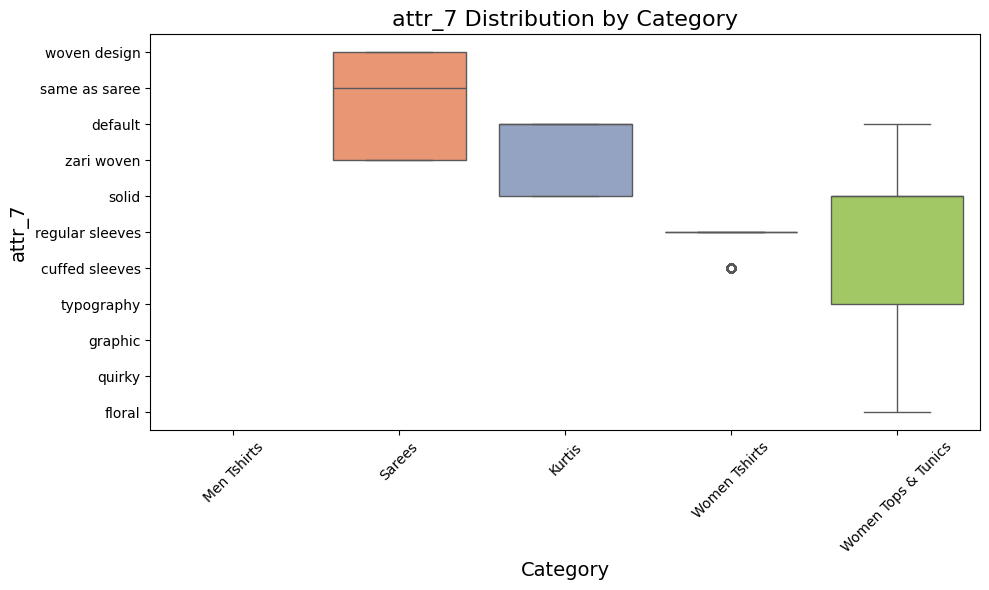

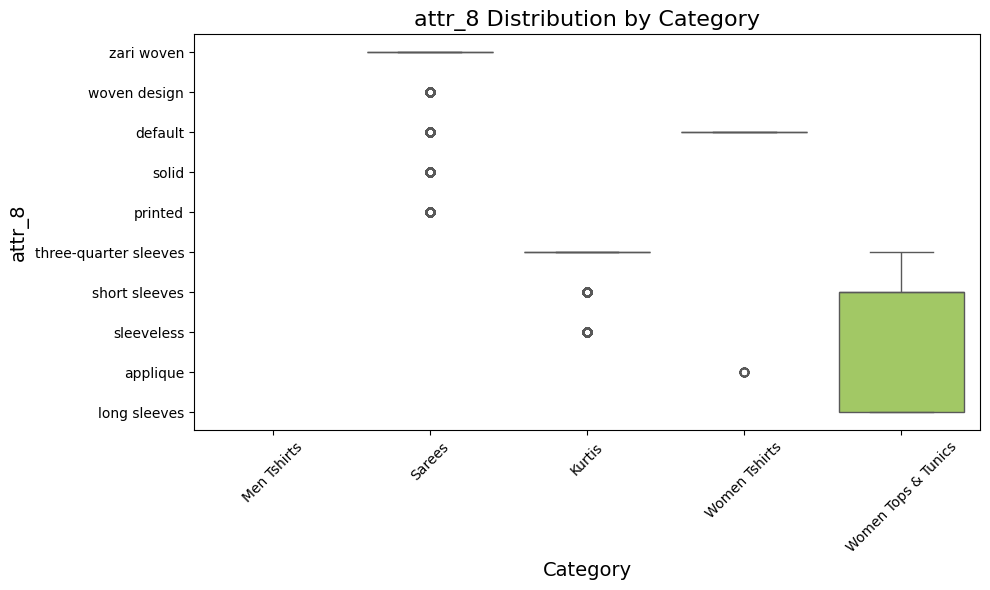

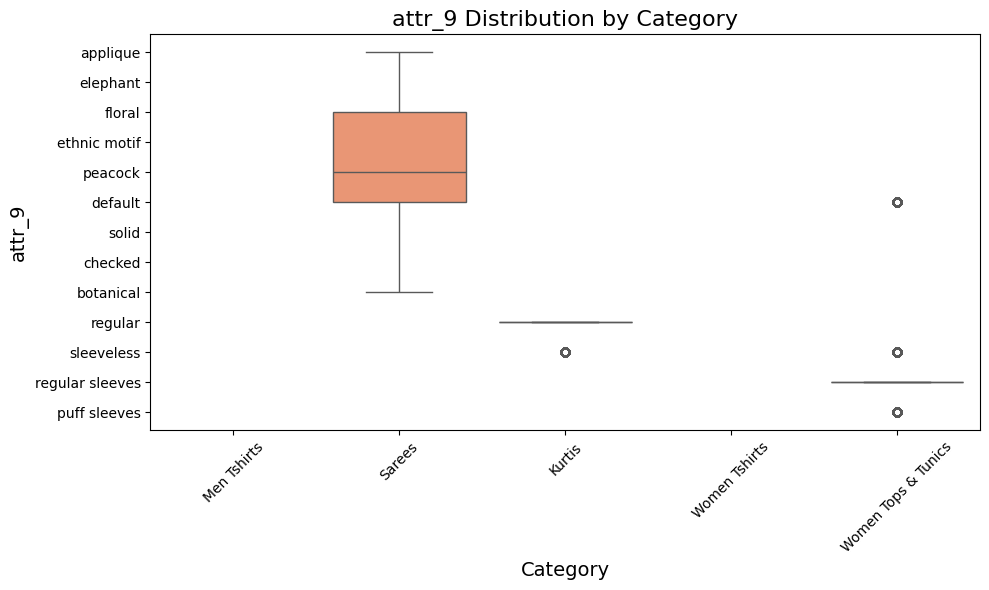

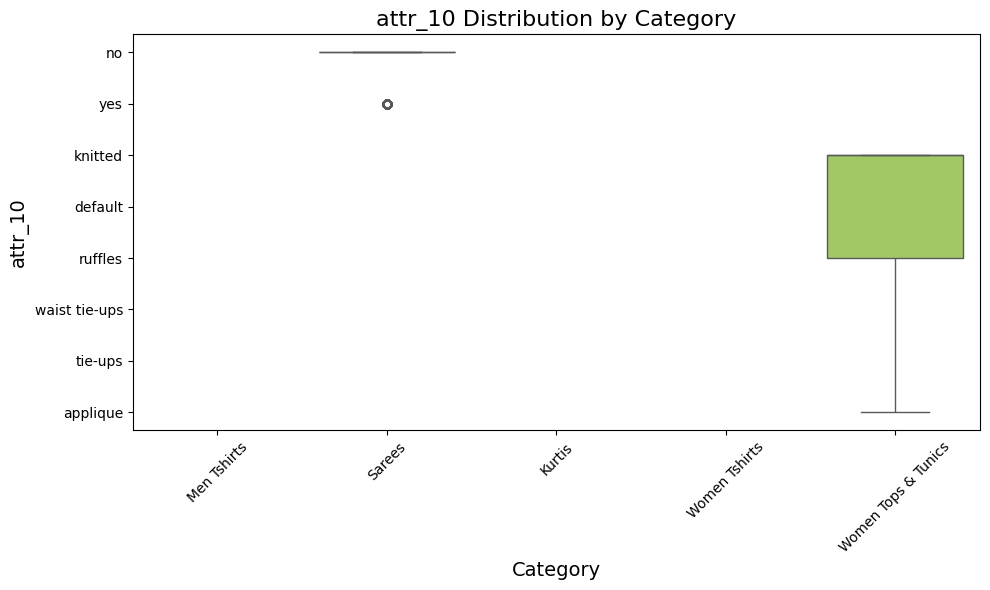

In [7]:
attributes = ["attr_1", "attr_2", "attr_3", "attr_4", "attr_5", 
              "attr_6", "attr_7", "attr_8", "attr_9", "attr_10"]
for attr in attributes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_data, x="Category", y=attr, hue="Category", legend=False, palette="Set2")
    plt.title(f"{attr} Distribution by Category", fontsize=16)
    plt.xlabel("Category", fontsize=14)
    plt.ylabel(attr, fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

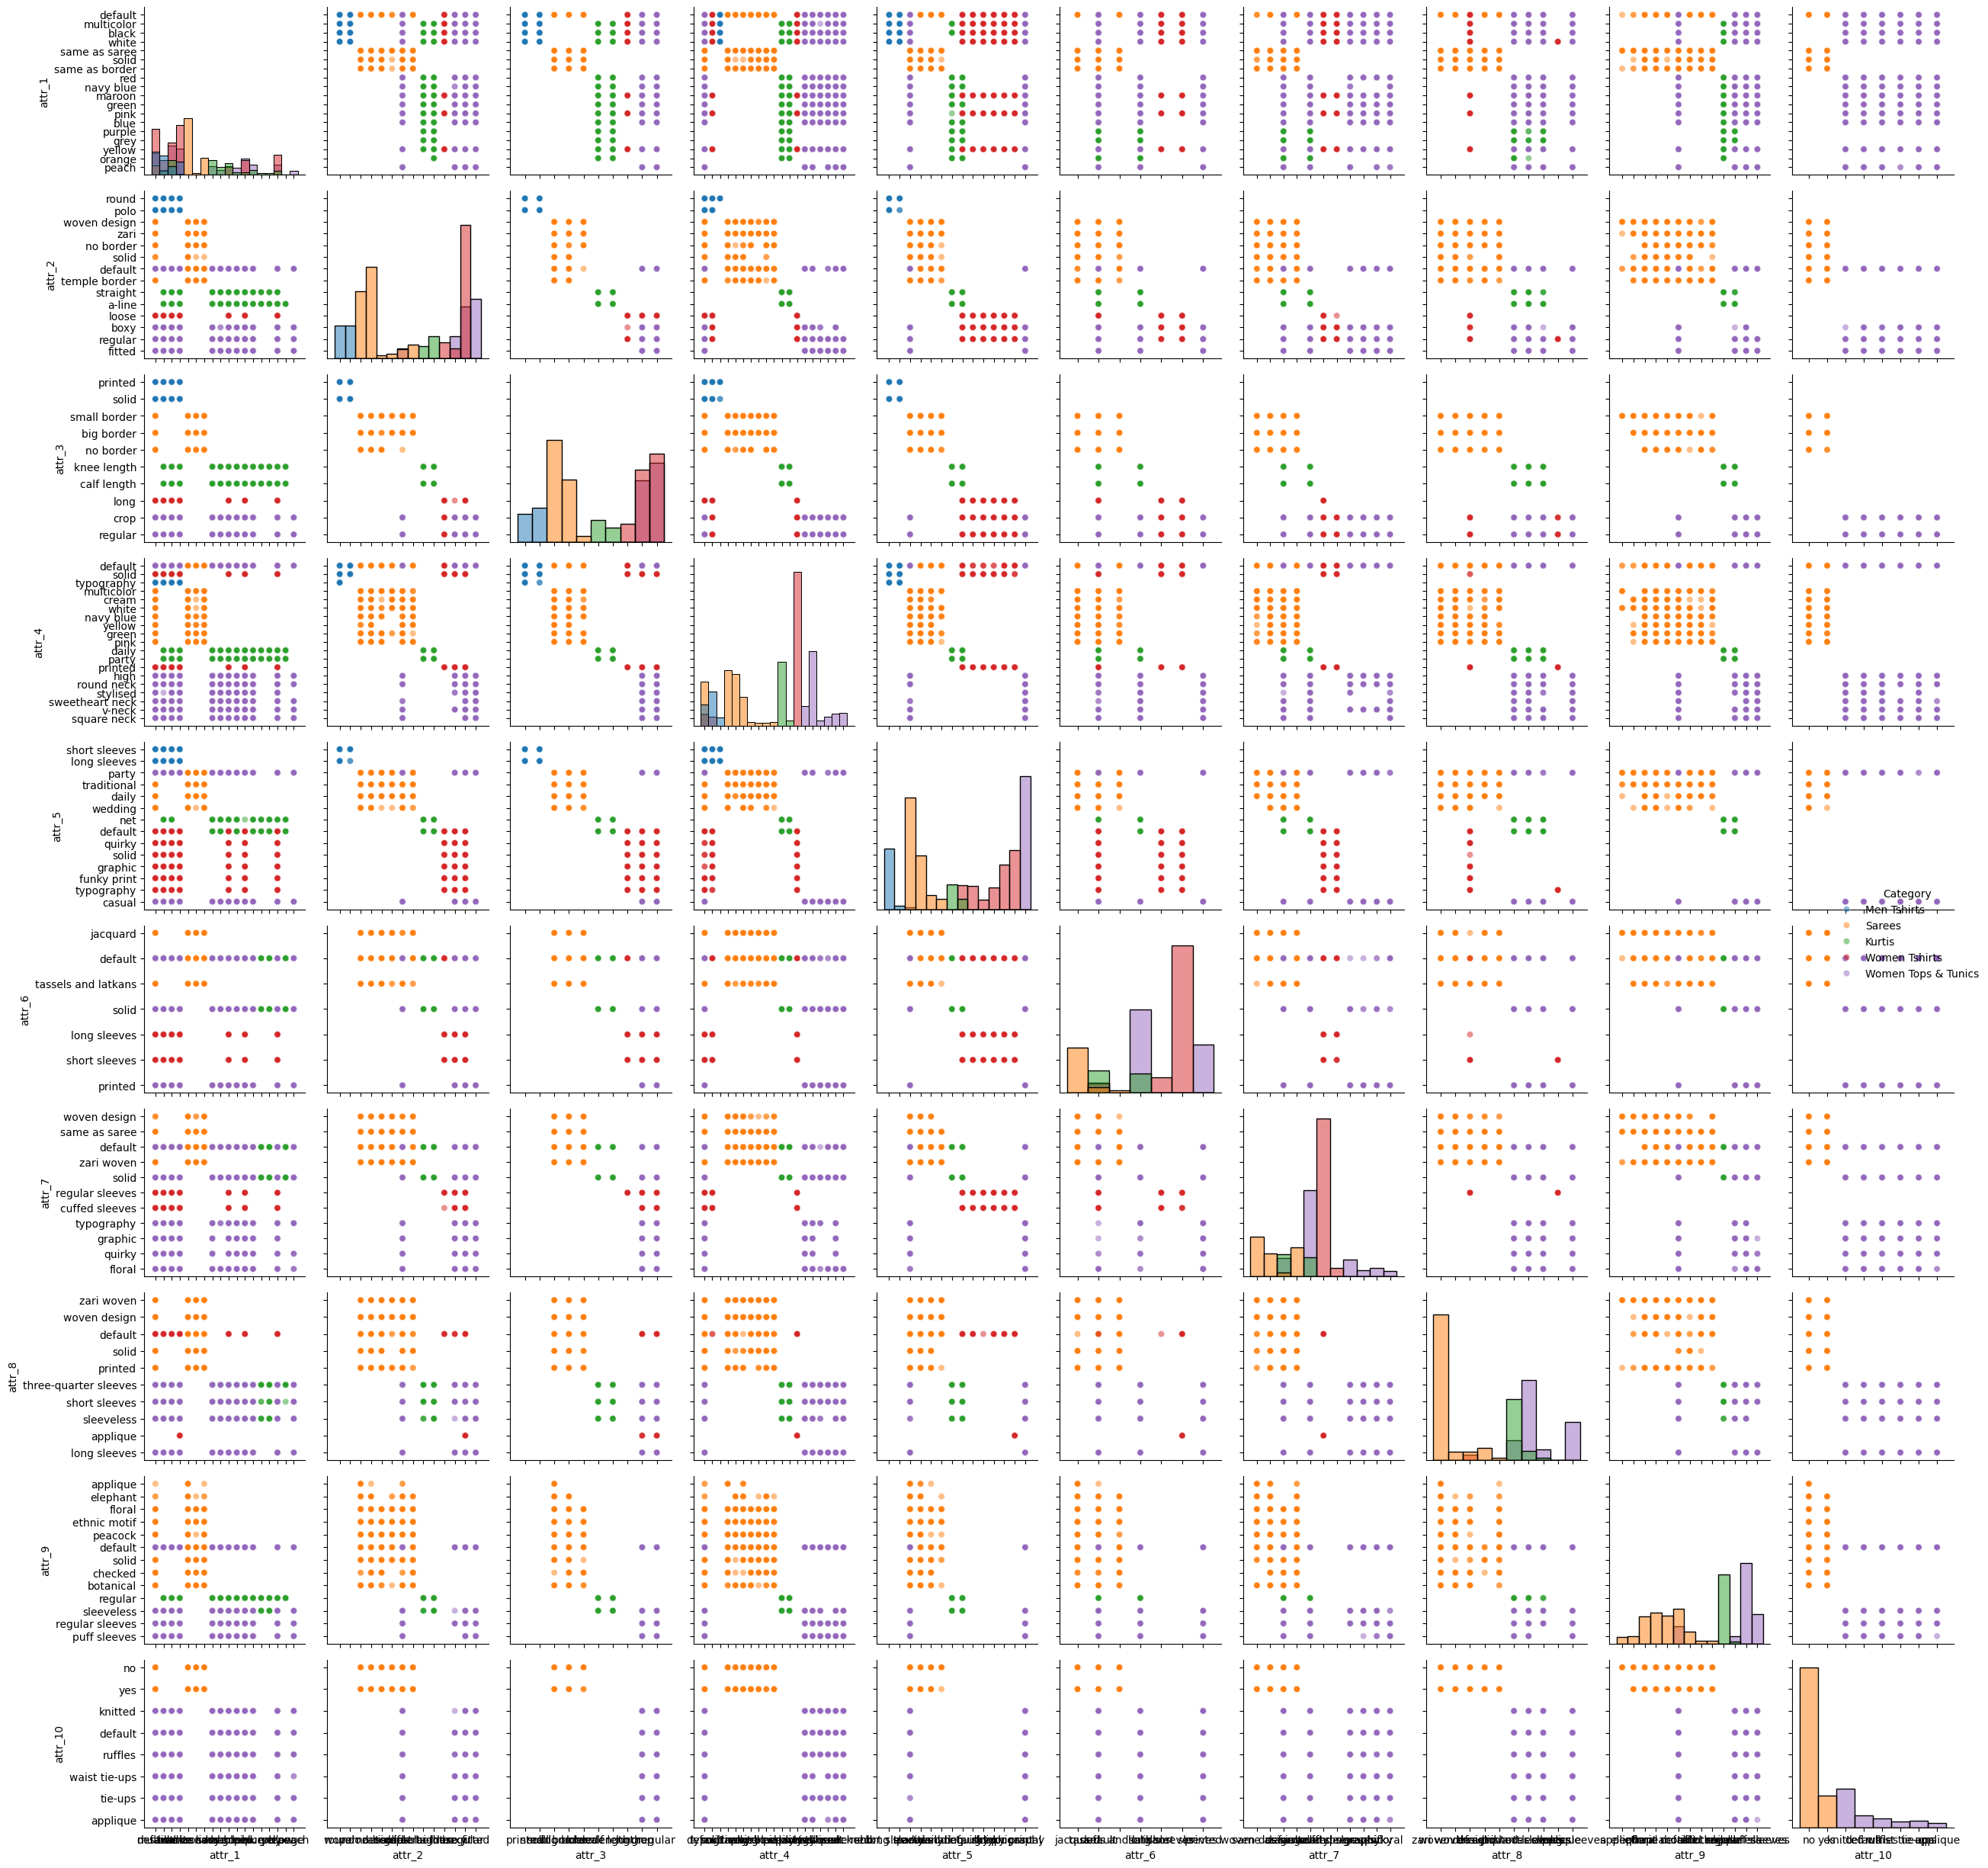

In [67]:

sns.pairplot(data=train_data, 
             vars=attributes,     
             hue="Category",       
             palette="tab10",      
             diag_kind="hist",     
             plot_kws={'alpha': 0.5},  
             height=2.5)           
plt.suptitle("Pair Plot of All Attributes Colored by Category", fontsize=16, y=1.02)
plt.show()



/tmp/ipykernel_70308/2804727658.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="plasma")  # You can choose any palette you prefer


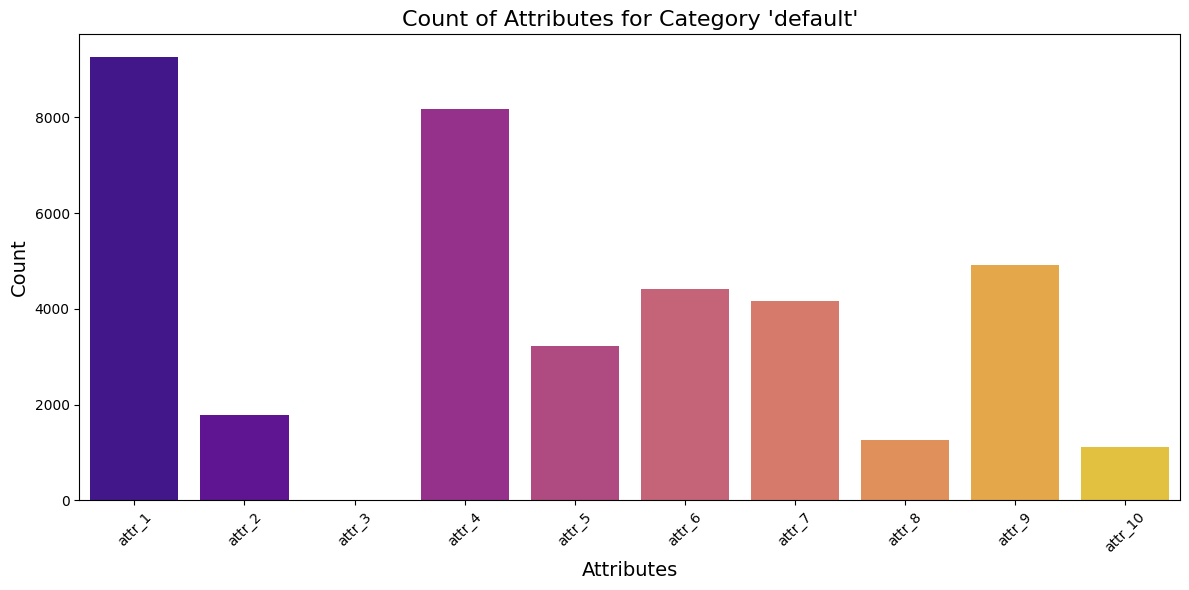

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is already defined
# Get the list of attributes that start with 'attr'
attributes = [col for col in train_data.columns if col.startswith("attr")]

# Count occurrences of each category in the attributes
attr_counts = train_data[attributes].apply(pd.Series.value_counts).fillna(0)

# If you want to visualize the counts of a specific category (e.g., "default")
specific_category = "default"
category_counts = (train_data[attributes] == specific_category).sum()

plt.figure(figsize=(12, 6))
# Use a color palette to differentiate each attribute
sns.barplot(x=category_counts.index, y=category_counts.values, palette="plasma")  # You can choose any palette you prefer
plt.title(f"Count of Attributes for Category '{specific_category}'", fontsize=16)
plt.xlabel("Attributes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
print(train_data.isnull().sum())

id              0
Category        0
len             0
attr_1      18346
attr_2      15021
attr_3      15515
attr_4      10325
attr_5      13720
attr_6      32097
attr_7      28798
attr_8      32739
attr_9      36648
attr_10     45214
dtype: int64


In [9]:
for column in train_data.columns[2:]:
    train_data[column] = train_data[column].fillna(train_data[column].mode()[0])

print("Missing values filled.")


Missing values filled.


In [10]:
print(train_data.isnull().sum())

id          0
Category    0
len         0
attr_1      0
attr_2      0
attr_3      0
attr_4      0
attr_5      0
attr_6      0
attr_7      0
attr_8      0
attr_9      0
attr_10     0
dtype: int64


In [11]:

category_attributes['Attribute_list'] = category_attributes['Attribute_list'].apply(
    lambda x: [attr.lower() for attr in x]
)
category_attributes.head()


,Category,No_of_attribute,Attribute_list
0,Men Tshirts,5,"[color, neck, pattern, print_or_pattern_type, ..."
1,Sarees,10,"[blouse_pattern, border, border_width, color, ..."
2,Kurtis,9,"[color, fit_shape, length, occasion, ornamenta..."
3,Women Tshirts,8,"[color, fit_shape, length, pattern, print_or_p..."
4,Women Tops & Tunics,10,"[color, fit_shape, length, neck_collar, ocassi..."


In [21]:
import os
from PIL import Image
import torchvision.transforms as transforms

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return transform(image)

train_image_folder = "train_images/"
test_image_folder = "test_images/"

preprocessed_train_images = {
    str(img_id): preprocess_image(os.path.join(train_image_folder, f"{img_id:06d}.jpg"))
    for img_id in train_data['id'][:2000]
}

preprocessed_test_images = {
    str(img_id): preprocess_image(os.path.join(test_image_folder, f"{img_id:06d}.jpg"))
    for img_id in test_data['id'][:750]
}


In [19]:
import torch
import torch.nn as nn
from torchvision import models

class EnhancedAttributeClassifier(nn.Module):
    def __init__(self, num_attributes, num_categories):
        super(EnhancedAttributeClassifier, self).__init__()

        self.feature_extractor = models.resnet18(pretrained=True)
        num_features = self.feature_extractor.fc.in_features
        self.feature_extractor.fc = nn.Identity() 

        embedding_dim = 50
        self.category_embedding = nn.Embedding(num_categories, embedding_dim)

        self.attention_layer = nn.Sequential(
            nn.Linear(num_features, num_features // 2),
            nn.ReLU(),
            nn.Linear(num_features // 2, 1),
            nn.Sigmoid()
        )

        self.attribute_heads = nn.ModuleList([
            nn.Sequential(
                nn.Linear(num_features + embedding_dim, 128),
                nn.BatchNorm1d(128),
                nn.ReLU(),
                nn.Dropout(0.5), 
                nn.Linear(128, 1)  
            ) for _ in range(num_attributes)
        ])

    def forward(self, images, categories):
        features = self.feature_extractor(images)
        
        attention_weights = self.attention_layer(features)
        features = features * attention_weights  

        category_embeds = self.category_embedding(categories)
        
        combined = torch.cat([features, category_embeds], dim=1)
        
        outputs = torch.cat(
            [head(combined).squeeze(1).unsqueeze(1) for head in self.attribute_heads],
            dim=1
        )
        return torch.sigmoid(outputs)





num_attributes = 77  
num_categories = len(subset_train_data['Category'].unique())
device = torch.device("cpu") 

model = EnhancedAttributeClassifier(num_attributes, num_categories).to(device)
print(model)

/home/kanav-arora/Desktop/AI/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kanav-arora/Desktop/AI/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EnhancedAttributeClassifier(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, moment

In [23]:
import torch
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from sklearn.metrics import f1_score

def compute_f1_scores(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    macro_f1 = f1_score(y_true, y_pred_binary, average='macro',zero_division=1)
    micro_f1 = f1_score(y_true, y_pred_binary, average='micro',zero_division=1)
    return macro_f1, micro_f1
    
# Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, preds, targets):
        bce_loss = nn.BCELoss(reduction='none')(preds, targets)
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * ((1 - pt) ** self.gamma) * bce_loss
        return focal_loss.mean()

# Label Smoothing Loss
class LabelSmoothingLoss(nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = smoothing

    def forward(self, preds, targets):
        targets = targets * (1 - self.smoothing) + self.smoothing / preds.size(1)
        return nn.BCELoss()(preds, targets)

# CutMix
def cutmix(images, labels, alpha=1.0):
    lam = np.random.beta(alpha, alpha)
    rand_index = torch.randperm(images.size(0))
    target_a = labels
    target_b = labels[rand_index]
    bbx1, bby1, bbx2, bby2 = rand_bbox(images.size(), lam)
    images[:, :, bbx1:bbx2, bby1:bby2] = images[rand_index, :, bbx1:bbx2, bby1:bby2]
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (images.size()[-1] * images.size()[-2]))
    return images, target_a, target_b, lam

def rand_bbox(size, lam):
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(W * cut_rat)
    cut_h = int(H * cut_rat)
    cx = np.random.randint(W)
    cy = np.random.randint(H)
    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)
    return bbx1, bby1, bbx2, bby2

# Mixup
def mixup(images, labels, alpha=1.0):
    lam = np.random.beta(alpha, alpha)
    rand_index = torch.randperm(images.size(0))
    mixed_images = lam * images + (1 - lam) * images[rand_index, :]
    targets_a, targets_b = labels, labels[rand_index]
    return mixed_images, targets_a, targets_b, lam

# Augmentation Application During Training
def apply_augmentations(images, labels, mode='cutmix', alpha=1.0):
    if mode == 'cutmix':
        return cutmix(images, labels, alpha)
    elif mode == 'mixup':
        return mixup(images, labels, alpha)
    else:
        raise ValueError("Invalid mode for augmentation. Use 'cutmix' or 'mixup'.")

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, preds, targets):
        bce_loss = nn.BCELoss()(preds, targets)
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss
        return focal_loss

# Function to compute dynamic thresholds
def compute_dynamic_thresholds(y_true, y_pred, step=0.01):
    from sklearn.metrics import f1_score
    thresholds = []
    for i in range(y_true.shape[1]):
        best_f1, best_threshold = 0, 0.5
        for threshold in np.arange(0, 1, step):  # Use np.arange to create thresholds
            y_pred_binary = (y_pred[:, i] > threshold).astype(float)  # Convert to float
            f1 = f1_score(y_true[:, i], y_pred_binary, zero_division=1)  # No need for .cpu()
            if f1 > best_f1:
                best_f1, best_threshold = f1, threshold
        thresholds.append(best_threshold)
    return thresholds

In [24]:
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

# Filter only attribute columns (attr_1 to attr_10)
attribute_cols = [col for col in train_data.columns if col.startswith('attr_')]

# Preprocessing function for each row
def preprocess_attributes(row):
    return [str(x).strip() for x in row if pd.notnull(x) and str(x).strip()]

# Apply row-wise to create lists of strings
formatted_labels = train_data[attribute_cols].apply(preprocess_attributes, axis=1)

# Combine all unique attributes across rows for binarization
unique_classes = sorted(set(attr for row in formatted_labels for attr in row))

# Use MultiLabelBinarizer with the unique classes
mlb = MultiLabelBinarizer(classes=unique_classes)
encoded_labels = mlb.fit_transform(formatted_labels)

# Confirm the output
encoded_df = pd.DataFrame(encoded_labels, columns=mlb.classes_)
train_data_encoded = pd.concat([train_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print(f"Classes: {mlb.classes_}")
print(f"Encoded labels shape: {encoded_labels.shape}")


Classes: ['a-line' 'applique' 'big border' 'black' 'blue' 'botanical' 'boxy'
 'calf length' 'casual' 'checked' 'cream' 'crop' 'cuffed sleeves' 'daily'
 'default' 'elephant' 'ethnic motif' 'fitted' 'floral' 'funky print'
 'graphic' 'green' 'grey' 'high' 'jacquard' 'knee length' 'knitted' 'long'
 'long sleeves' 'loose' 'maroon' 'multicolor' 'navy blue' 'net' 'no'
 'no border' 'orange' 'party' 'peach' 'peacock' 'pink' 'polo' 'printed'
 'puff sleeves' 'purple' 'quirky' 'red' 'regular' 'regular sleeves'
 'round' 'round neck' 'ruffles' 'same as border' 'same as saree'
 'short sleeves' 'sleeveless' 'small border' 'solid' 'square neck'
 'straight' 'stylised' 'sweetheart neck' 'tassels and latkans'
 'temple border' 'three-quarter sleeves' 'tie-ups' 'traditional'
 'typography' 'v-neck' 'waist tie-ups' 'wedding' 'white' 'woven design'
 'yellow' 'yes' 'zari' 'zari woven']
Encoded labels shape: (70213, 77)


In [22]:
formatted_labels

0        [default, round, printed, default, short sleev...
1        [multicolor, polo, solid, solid, short sleeves...
2        [default, polo, solid, solid, short sleeves, s...
3        [multicolor, polo, solid, solid, short sleeves...
4        [multicolor, polo, solid, solid, short sleeves...
                               ...                        
70208    [multicolor, fitted, regular, square neck, cas...
70209    [yellow, regular, crop, round neck, casual, de...
70210    [maroon, fitted, crop, round neck, casual, sol...
70211    [default, regular, regular, high, casual, shor...
70212    [pink, boxy, crop, v-neck, casual, printed, ty...
Length: 70213, dtype: object

In [25]:
class AttributeDataset(Dataset):
    def __init__(self, dataframe, preprocessed_images, encoded_labels, category_encoder):
        """
        Args:
            dataframe: DataFrame containing metadata (e.g., ID, Category).
            preprocessed_images: Dictionary mapping image IDs to tensors.
            encoded_labels: Encoded attribute labels (e.g., numpy array or tensor).
            category_encoder: Encoder for converting categories to numerical labels.
        """
        self.dataframe = dataframe
        self.preprocessed_images = preprocessed_images
        self.encoded_labels = encoded_labels
        self.category_encoder = category_encoder

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Retrieve metadata row
        row = self.dataframe.iloc[idx]

        # Load the image
        img_id = str(row['id'])  # Ensure ID is string to match dictionary keys
        if img_id in self.preprocessed_images:
            image = self.preprocessed_images[img_id]
        else:
            # Log missing image and use a placeholder tensor
            print(f"Image not found for ID: {img_id}. Using dummy tensor.")
            image = torch.zeros(3, 224, 224)  # Dummy tensor for missing images

        # Encode the category
        category = row['Category']
        category = torch.tensor(self.category_encoder.transform([category])[0], dtype=torch.long)

        # Load the pre-encoded attribute labels
        labels = torch.tensor(self.encoded_labels[idx], dtype=torch.float32)

        return image, category, labels


In [18]:
subset_train_data = train_data.head(2000) 
subset_encoded_labels = encoded_labels[:2000]

In [91]:
print(len(subset_train_data))

2000


In [26]:
# Use all training data
from sklearn.preprocessing import LabelEncoder

category_encoder=LabelEncoder()
category_encoder.fit(subset_train_data['Category'])
train_dataset = AttributeDataset(subset_train_data,preprocessed_train_images, encoded_labels,category_encoder=category_encoder)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Check the size of the dataset and loader
print("Size of train dataset:", len(train_dataset))
print("Size of train loader (number of batches):", len(train_loader))

Size of train dataset: 2000
Size of train loader (number of batches): 63


In [27]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv('train.csv')

# Get unique categories from the 'Category' column and create a mapping to indices
category_to_index = {category: idx for idx, category in enumerate(train_df['Category'].unique())}
print(category_to_index)  # This will show the actual category to index mapping


{'Men Tshirts': 0, 'Sarees': 1, 'Kurtis': 2, 'Women Tshirts': 3, 'Women Tops & Tunics': 4}


In [28]:
device = torch.device("cpu")


In [29]:
import torch.optim as optim
import numpy as np

# Initialize criterion and optimizer
criterion = FocalLoss(alpha=0.25, gamma=2.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Training loop
epochs = 5
model.train()
for epoch in range(epochs):
    running_loss = 0.0
    all_labels = []
    all_outputs = []
    
    for batch in train_loader:
        # Unpack the batch
        images, categories, labels = batch

        # Move tensors to the correct device
        images, categories, labels = images.to(device), categories.to(device), labels.to(device)

        # Apply augmentations (you can choose 'cutmix' or 'mixup')
        images, target_a, target_b, lam = apply_augmentations(images, labels, mode='cutmix', alpha=1.0)

        optimizer.zero_grad()  # Reset gradients
        outputs = model(images, categories)  # Forward pass
        loss_a = criterion(outputs, target_a.float())  # Compute loss for target_a
        loss_b = criterion(outputs, target_b.float())  # Compute loss for target_b
        loss = lam * loss_a + (1 - lam) * loss_b  # Combine losses

        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()
        
        all_labels.append(labels.cpu().numpy())
        all_outputs.append(outputs.cpu().detach().numpy())

    # Compute F1 scores after each epoch
    all_labels = np.concatenate(all_labels)
    all_outputs = np.concatenate(all_outputs)
    macro_f1, micro_f1 = compute_f1_scores(all_labels, all_outputs)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader)}, Macro F1: {macro_f1}, Micro F1: {micro_f1}")


Epoch 1/5, Loss: 0.010190049012649863, Macro F1: 0.11346268830182875, Micro F1: 0.615994466319038
Epoch 2/5, Loss: 0.0015403521302643987, Macro F1: 0.8569003702634661, Micro F1: 0.838219635124583
Epoch 3/5, Loss: 0.0013871441561994807, Macro F1: 0.857649551575132, Micro F1: 0.807864928403505
Epoch 4/5, Loss: 0.0013240801238839234, Macro F1: 0.8787352403323935, Micro F1: 0.8036698552683048
Epoch 5/5, Loss: 0.0014278511756971952, Macro F1: 0.8751514031393097, Micro F1: 0.7924823805794832


In [30]:

dynamic_thresholds = compute_dynamic_thresholds(all_labels, all_outputs)
print("Dynamic thresholds:", dynamic_thresholds)

Dynamic thresholds: [np.float64(0.42), np.float64(0.43), np.float64(0.43), np.float64(0.09), np.float64(0.42), np.float64(0.43), np.float64(0.4), np.float64(0.42), np.float64(0.17), np.float64(0.41000000000000003), np.float64(0.42), np.float64(0.45), np.float64(0.42), np.float64(0.44), np.float64(0.39), np.float64(0.43), np.float64(0.41000000000000003), np.float64(0.39), np.float64(0.4), np.float64(0.44), np.float64(0.4), np.float64(0.44), np.float64(0.42), np.float64(0.43), np.float64(0.41000000000000003), np.float64(0.45), np.float64(0.43), np.float64(0.43), np.float64(0.01), np.float64(0.4), np.float64(0.42), np.float64(0.31), np.float64(0.46), np.float64(0.41000000000000003), np.float64(0.0), np.float64(0.44), np.float64(0.41000000000000003), np.float64(0.44), np.float64(0.46), np.float64(0.41000000000000003), np.float64(0.42), np.float64(0.0), np.float64(0.18), np.float64(0.44), np.float64(0.43), np.float64(0.44), np.float64(0.41000000000000003), np.float64(0.03), np.float64(0.0),

In [36]:
import torch
from torchvision import transforms
from PIL import Image
import torch.nn.functional as F

# Define the preprocessing transformation (adjust based on model requirements)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet stats
])

# Load the image
test_image_path = '/home/kanav-arora/Desktop/AI/test_images/000007.jpg'
test_image = Image.open(test_image_path).convert('RGB')  # Ensure it's RGB format

# Preprocess the image
test_image = preprocess(test_image).unsqueeze(0).to(device)  # Add batch dimension and move to device

# Assume the category is known (replace with actual category index)
category_index = 0  # Replace with actual category index (you can map category names to indices)

# Convert the category to a tensor
category_tensor = torch.tensor([category_index], dtype=torch.long).to(device)

# Switch to evaluation mode and make prediction
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # No need to calculate gradients during inference
    output = model(test_image, category_tensor)  # Make prediction
    probability = torch.sigmoid(output)  # Apply sigmoid to logits to get probabilities
    prediction = (probability > 0.6).float()  # Binarize the output based on threshold (0.5)
print(prediction)

predicted_attributes = prediction.squeeze().tolist()  # Convert to list
attributes = [
    'a-line', 'applique', 'big border', 'black', 'blue', 'botanical', 'boxy',
    'calf length', 'casual', 'checked', 'cream', 'crop', 'cuffed sleeves', 'daily',
    'default', 'elephant', 'ethnic motif', 'fitted', 'floral', 'funky print',
    'graphic', 'green', 'grey', 'high', 'jacquard', 'knee length', 'knitted', 'long',
    'long sleeves', 'loose', 'maroon', 'multicolor', 'navy blue', 'net', 'no',
    'no border', 'orange', 'party', 'peach', 'peacock', 'pink', 'polo', 'printed',
    'puff sleeves', 'purple', 'quirky', 'red', 'regular', 'regular sleeves',
    'round', 'round neck', 'ruffles', 'same as border', 'same as saree',
    'short sleeves', 'sleeveless', 'small border', 'solid', 'square neck',
    'straight', 'stylised', 'sweetheart neck', 'tassels and latkans',
    'temple border', 'three-quarter sleeves', 'tie-ups', 'traditional',
    'typography', 'v-neck', 'waist tie-ups', 'wedding', 'white', 'woven design',
    'yellow', 'yes', 'zari', 'zari woven'
]
# Print each attribute with its prediction
for name, value in zip(attributes, predicted_attributes):
    print(f"{name}: {'Present' if value == 1 else 'Absent'}")

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
         1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 1.]])
a-line: Absent
applique: Absent
big border: Absent
black: Absent
blue: Absent
botanical: Absent
boxy: Absent
calf length: Absent
casual: Absent
checked: Absent
cream: Absent
crop: Absent
cuffed sleeves: Absent
daily: Absent
default: Present
elephant: Absent
ethnic motif: Absent
fitted: Absent
floral: Absent
funky print: Absent
graphic: Absent
green: Absent
grey: Absent
high: Absent
jacquard: Absent
knee length: Absent
knitted: Absent
long: Absent
long sleeves: Absent
loose: Absent
maroon: Absent
multicolor: Absent
navy blue: Absent
net: Absent
no: Present
no border: Absent
orange: Absent
party: Absent
peach: Absent
peacock: Absent
pink: 

In [40]:
# Assuming categories is a list of category strings
if isinstance(categories, tuple):
    # Convert each category string to its corresponding index
    category_indices = [category_to_index[cat] for cat in categories]
    categories = torch.tensor(category_indices, dtype=torch.long).to(device)

In [ ]:
from fastapi import FastAPI, File, UploadFile
import io

app = FastAPI()

@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    image = Image.open(io.BytesIO(await file.read())).convert("RGB")
    image = transform(image).unsqueeze(0).cuda()  # Preprocess
    model.eval()
    with torch.no_grad():
        outputs = model(image)
    predictions = outputs.cpu().numpy()
    return {"attributes": predictions.tolist()}

# Run with: uvicorn filename:app --reload


In [104]:
# Save the trained model
torch.save(model.state_dict(), 'enhanced_attribute_classifier.pth')
